In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "the number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "the number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "dimensions are not equal"
assert(X_test.shape[1:] == (28,28)), "dimensions are not equal"

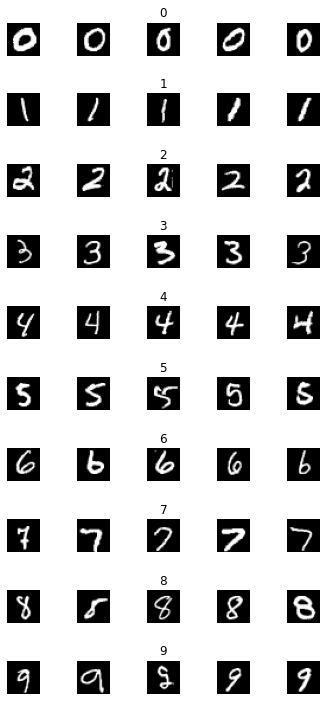

In [ ]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap = plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'number of images')

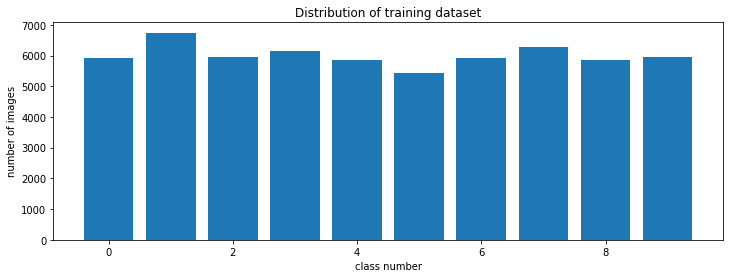

In [ ]:
print(num_of_samples)
plt.figure( figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples )
plt.title("Distribution of training dataset")
plt.xlabel("class number")
plt.ylabel("number of images")

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)

(60000, 784)


In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels, activation="relu"))
  model.add(Dense(10, activation="relu"))
  model.add(Dense(num_classes, activation= "softmax"))
  model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.6609 - accuracy: 0.7909 - val_loss: 0.3479 - val_accuracy: 0.8913
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3783 - accuracy: 0.8896 - val_loss: 0.2864 - val_accuracy: 0.9158
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.9004 - val_loss: 0.2623 - val_accuracy: 0.9230
Epoch 4/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.9057 - val_loss: 0.2606 - val_accuracy: 0.9273
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3089 - accuracy: 0.9093 - val_loss: 0.2416 - val_accuracy: 0.9268
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2997 - accuracy: 0.9123 - val_loss: 0.2407 - val_accuracy: 0.9290
Epoch 7/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2947 - accuracy: 0.9141 - val_loss: 0.2369 - val_accuracy: 0.9295
Epoch 

Text(0.5, 0, 'epochs')

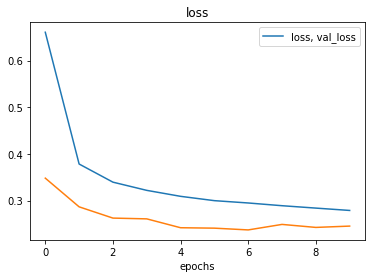

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss, val_loss'])
plt.title("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

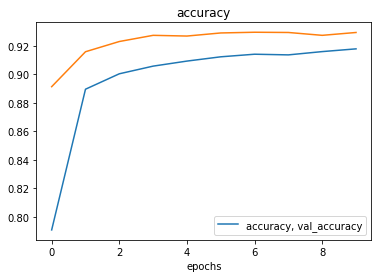

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy, val_accuracy'])
plt.title("accuracy")
plt.xlabel("epochs")

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('test score:', score[0])
print('test accuracy:', score[1])

test score: 0.29333165287971497
test accuracy: 0.9129999876022339


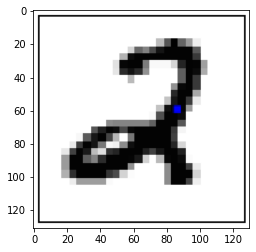

In [ ]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

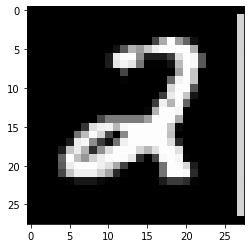

In [ ]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
img = img/255
img = img.reshape(1, 784)

In [ ]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted digit: [2]
